In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
with open('/Users/mirandamelodies99/code/if-agents/experiments/autoreg_dspy_detective_100_predict_1709247169.470474/detective.z5.json', 'r') as f:
    autoregressive_gpt_35_results = json.load(f)

with open('/Users/mirandamelodies99/code/if-agents/experiments/autoreg_dspy_detective_100_predict_gpt4_1709254662.752867/detective.z5.json', 'r') as f:
    autoregressive_gpt_4_results = json.load(f)

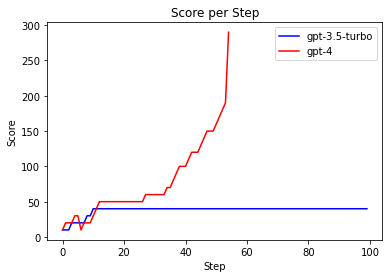

In [3]:
# Convert list of dictionaries into pandas DataFrame
df_35 = pd.DataFrame(autoregressive_gpt_35_results)
df_4 = pd.DataFrame(autoregressive_gpt_4_results)

# Create a new figure
plt.figure()

# Plot the 'gpt-3.5-turbo' with its score
plt.plot(df_35.index, df_35['score'], color='blue', label='gpt-3.5-turbo')

# Plot the 'gpt-4' with its score
plt.plot(df_4.index, df_4['score'], color='red', label='gpt-4')

# Set the title and labels
plt.title("Score per Step")
plt.xlabel('Step')
plt.ylabel('Score')

# Show the legend
plt.legend()

# Show the plot
plt.show()